## 01 Load CSV

- EDA กับข้อมูลที่ต้องการใช้งาน

In [1]:
import pandas as pd
import numpy as np

### CSSE time series

In [2]:
cases = ['confirmed', 'deaths', 'recovered']


def get_csse_filename(case):
    file_name = f"time_series_covid19_{case}_global.csv"
    return file_name

In [3]:
case = cases[0]
df = pd.read_csv(
    f"./COVID-19/csse_covid_19_data/csse_covid_19_time_series/{get_csse_filename(case)}"
)

In [4]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,...,746,747,749,860,862,863,865,867,868,870
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1629,1640,1654,1674,1674,1681,1691,1703,1711,1726
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,337,337,340,340,340,354,354,354,378,378
264,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,...,6967,7015,7060,7104,7150,7192,7235,7276,7320,7366


In [5]:
country = "Thailand"

In [6]:
country_data = df[df['Country/Region'] == country]

In [7]:
country_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20
209,NaN,Thailand,15.870032,100.992541,2,3,5,7,8,8,...,3255,3261,3279,3279,3282,3291,3297,3297,3298,3304


In [11]:
country_data.iloc[:, 4:]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20
209,2,3,5,7,8,8,14,14,14,19,...,3255,3261,3279,3279,3282,3291,3297,3297,3298,3304


### plot

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context="paper", style="whitegrid", 
       rc={
           "figure.figsize": (9, 5),
           "figure.dpi": 100
       })
google = ["#4285F4", "#DB4437", "#F4B400", "#0F9D58"]
sns.set_palette(google)

In [18]:
data = np.array(country_data.iloc[:, 4:]).squeeze()
x = np.arange(len(data))

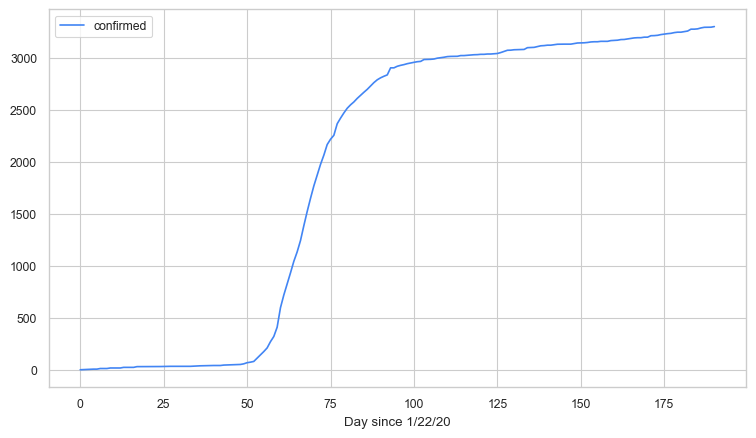

In [23]:
sns.lineplot(x, data, label=case)
plt.xlabel("Day since {}".format(country_data.columns[4]))

plt.ylabel("case")
plt.show()